In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import hvplot.pandas
from bokeh.models import HoverTool

### 1. Gas Station Brands per Zip Code
Exploring to see if gas station brands have any trends per zip code

In [2]:
#reading in csv files
extra_clean_gas = pd.read_csv("Resources/extra_clean_gas.csv")
extra_clean_gas = extra_clean_gas.drop('Unnamed: 0', axis=1)



In [3]:
 # Extract the 'business' column as a list
 brand_name1 = extra_clean_gas['business'].to_list()

 # Create an empty list to store the modified names
 new_brand_name = []

 # Create a list of words to search for
 brands_to_check = ['76', 'ARCO', 'Chevron', 'Exxon', 'Flyers', 'Valero', 'Mobil', 'Qwik Korner', 'Shell', 'Sinclair', 'Speedway', 'United', 'Vons Fuel Station']

 # Iterate over the list of names
 for bname in brand_name1:
     # Check if the name contains any of the words to search for
     if any(brand in bname for brand in brands_to_check):
         # Rename the name to just the word
         new_name = [brand for brand in brands_to_check if brand in bname][0]
     else:
         new_name = bname

     # Add the new name to the list
     new_brand_name.append(new_name)

 print(new_brand_name)
 extra_clean_gas['Brand Name'] = new_brand_name


['Shell', 'Shell', 'Valero', 'Chevron', 'Valero', 'ARCO', 'Shell', 'Speedway', 'Shell', 'Chevron', 'Speedway', 'Chevron', 'Shell', 'Mobil', 'Exxon', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Chevron', 'Hazard Center Auto Mart', 'Shell', 'Chevron', 'Shell', 'Shell', '76', 'Chevron', '76', 'ARCO', 'Chevron', 'Chevron', 'Vons Fuel Station', 'Shell', 'Shell', 'Shell', 'Ultra Gas', 'Mobil', 'Tierrasanta Gas Station', 'ARCO', 'ARCO', 'Fast Fuel Car Care Center', 'ARCO', 'ARCO', 'Chevron', 'Shell', '76', 'Valero', 'Mobil', 'Shell', 'J & R Gas and Mini Mart', 'United', 'Chevron', 'ARCO', 'Valero', 'ARCO', '76', 'Petromerica', 'Chevron', 'ARCO', 'Shell', 'Chevron', 'ARCO', 'Speedway', 'Chevron', 'Chevron', 'Shell', 'Bay Park Fuel', '76', 'Shell', 'Chevron', 'Good Point Gasoline', 'Shell', 'ARCO', 'Chevron', 'Chevron', 'Chevron', 'Shell', 'Shell', 'Shell', 'Mobil', 'Shell', 'ARCO', 'Shell', 'Fashion Valley Gas', 'Summit Gasoline', 'Thrifty', '76', 'Shell', 'Chevron', '76', 'Shell', 'Chevron', '

In [4]:
# Create new columns
new_cols = ['Brand Name', 'business', 'zip code', 'address', 'gas1 currency', 'gas1 type',
       'gas1 price', 'gas1 pricetag', 'gas1 unit', 'gas1 updated',
       'gas2 currency', 'gas2 type', 'gas2 price', 'gas2 pricetag',
       'gas2 unit', 'gas2 updated', 'gas3 currency', 'gas3 type', 'gas3 price',
       'gas3 pricetag', 'gas3 unit', 'gas3 updated']

extra_clean_gas_w_brand = extra_clean_gas[new_cols]

# Create dataframe showing gas stations with corresponding zip codes
zip_brand = extra_clean_gas_w_brand.loc[:,['zip code','Brand Name']]

# Find out break down of gas stations in each zip code
counts_per_zip_per_brand = zip_brand.groupby(zip_brand['zip code'])['Brand Name'].value_counts()

# Turn it into a dataframe
counts_per_zip_per_brand_df = pd.DataFrame(counts_per_zip_per_brand)
counts_per_zip_per_brand_df = counts_per_zip_per_brand_df.rename(columns={"Brand Name": "count"})
counts_per_zip_per_brand_df


count
zip code Brand Name              
92014    Chevron                1
         Shell                  1
         Mobil                  1
92025    Vons Fuel Station      1
         Varso Gas Station      1
...                           ...
92154    ARCO                   1
         Flyers                 1
         US Gasoline            1
92173    Chevron                2
         ARCO                   2

[123 rows x 1 columns]

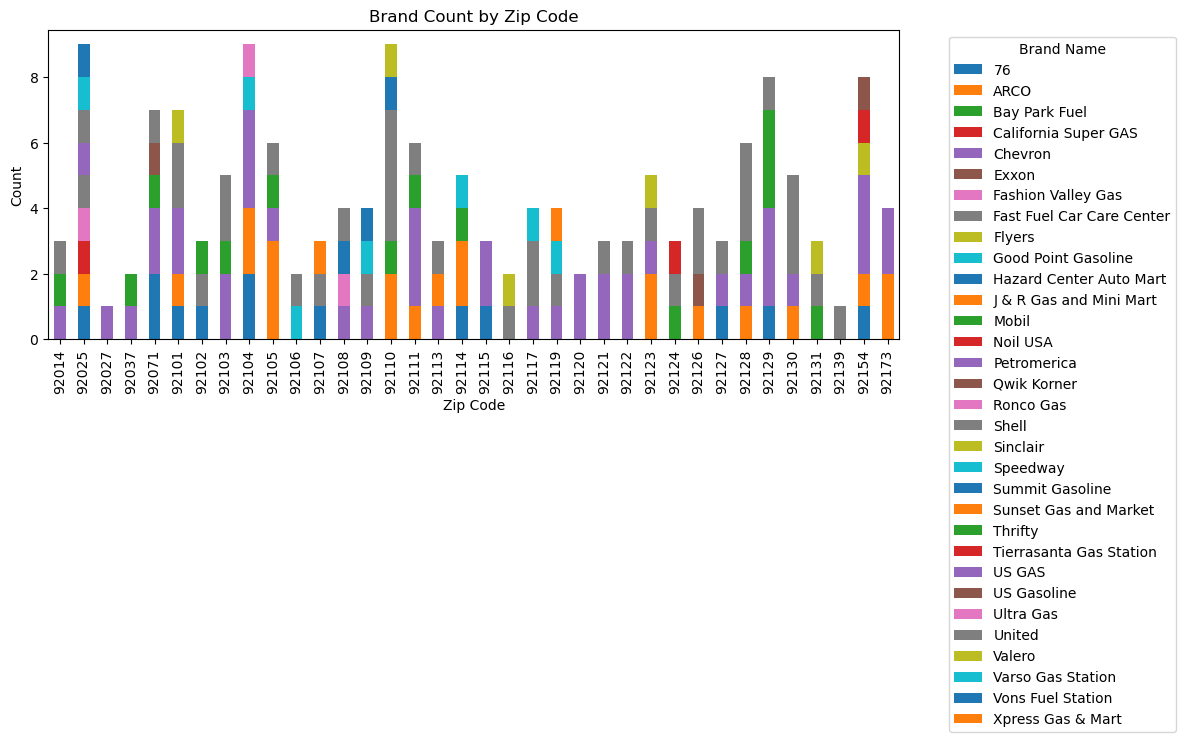

In [5]:
# Group the data by Zip Code and Brand Name and sum the counts
grouped = counts_per_zip_per_brand_df.groupby(['zip code', 'Brand Name'])['count'].sum().unstack().fillna(0)

# Plot the bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brand Count by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.legend(title='Brand Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Save the figure
plt.savefig("Fig_output/fig01_brandbyzip.png")

plt.show()

In [6]:
#getting zipcode brand name and gas price columns
zip_brand_price = extra_clean_gas_w_brand.loc[:,['zip code','Brand Name', 'gas1 price']]

#group by brand name and average the regular gas price per zip code
group_brand = zip_brand_price.groupby(["Brand Name"])["gas1 price"].mean()

zip code
92014    6.193333
92025    5.966667
92027    6.500000
92037    6.330000
92071    6.180000
Name: gas1 price, dtype: float64

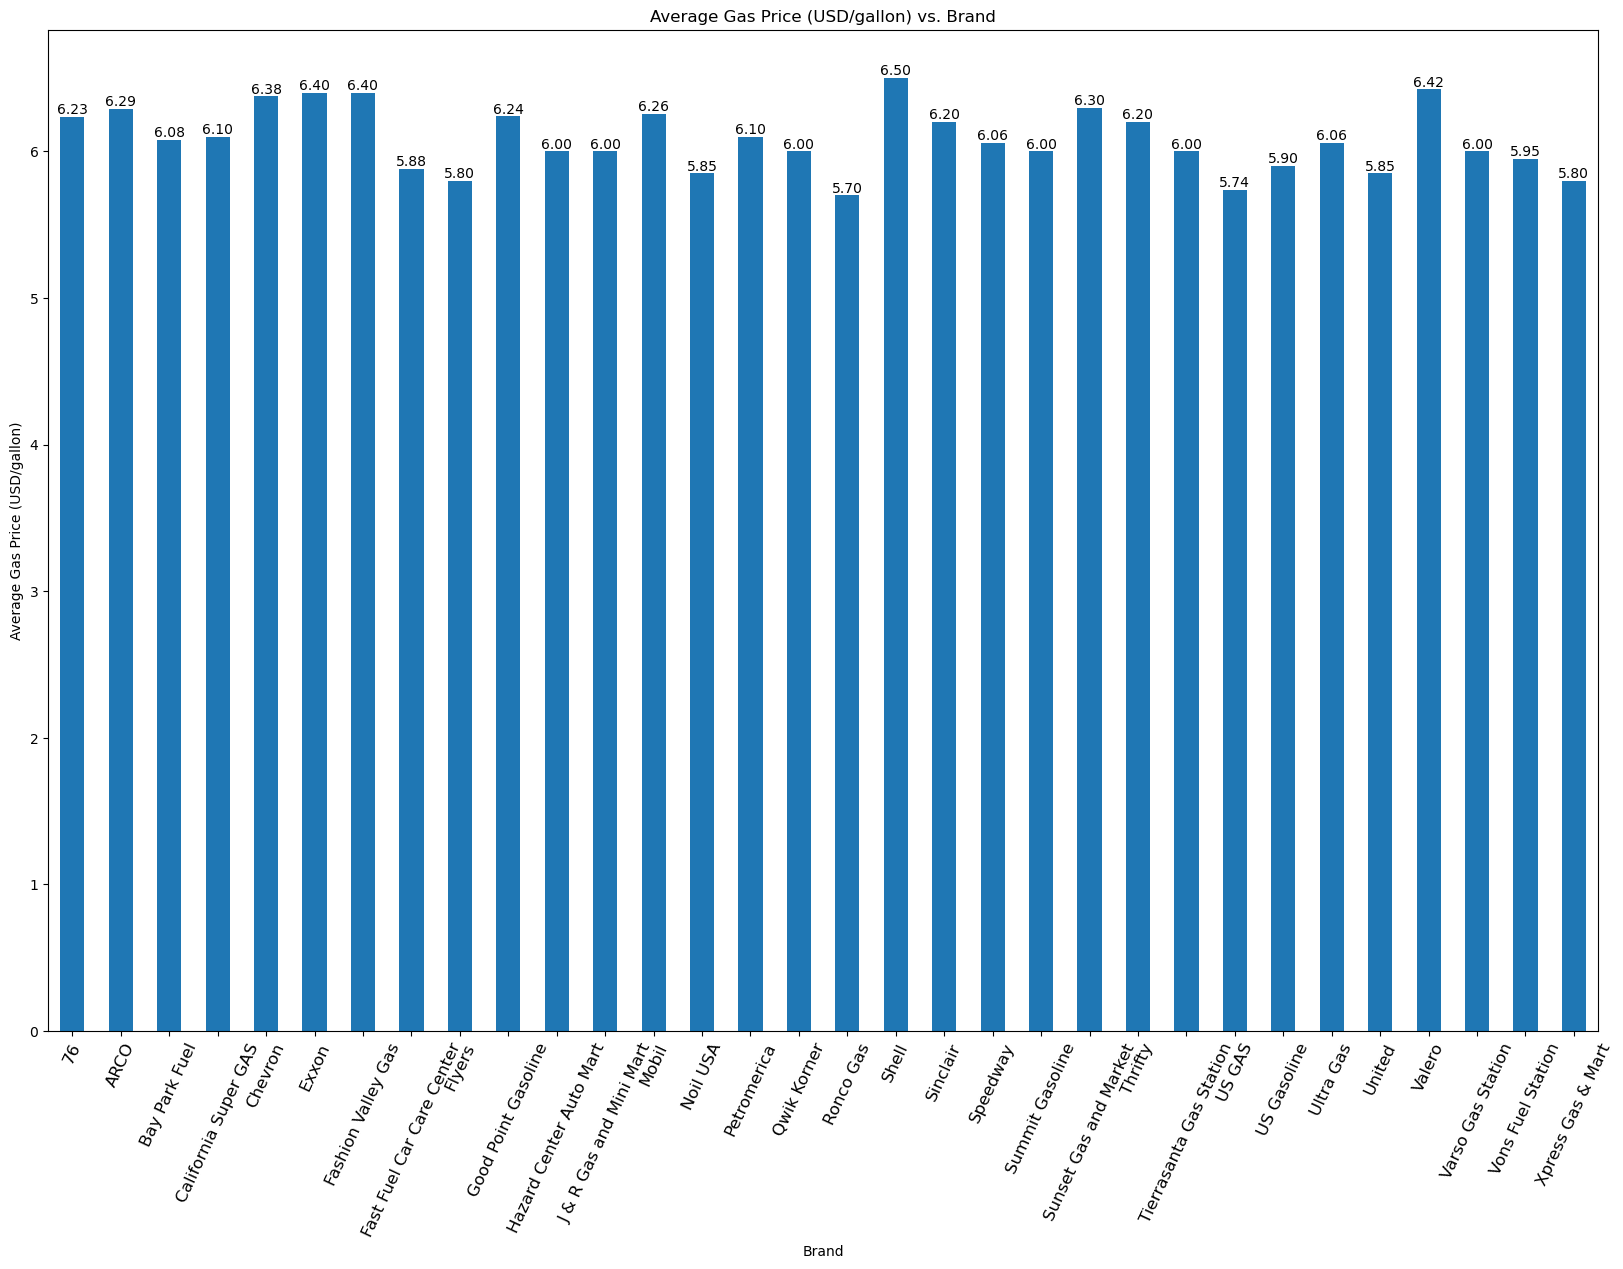

In [7]:
#ploting the average regular gas price for each brand gas station
ax = group_brand.plot(x= "Brandname", y= "gas1 price", rot = 65, kind= "bar", width=.5, figsize=(20,13))
bar_name = ax
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12) 

#adding labels and titles to graph
plt.xlabel("Brand")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Brand")

#adding labels to each bar
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
ax.bar_label(ax.containers[0],fmt='%.2f')


#Save the figure
plt.savefig("Fig_output/fig02_avggasbyzip.png")

plt.show()

### 2. Correlation between gas type (reg, mid, super) and Zip Code
Exploring to see if the Zip Code changes the difference between the gas prices.

In [8]:
#reading in data
gas_data_df = pd.read_csv("Resources/Zip Code Data All.csv")
gas_data_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


In [9]:
#defining function that plots the linear regression line and outputs rsquared value
def linear_regression(x_values,y_values, clr):
    corr = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-squared is : {corr}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str("{:.2e}".format(slope)) + "x + " + str(round(intercept,2))
   
    plt.plot(x_values,regress_values,color = clr)
    
    return line_eq

The r-squared is : 0.17
The r-squared is : 0.19
The r-squared is : 0.2


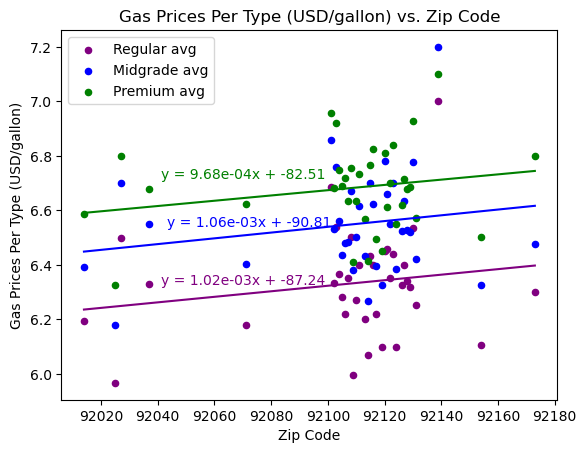

In [10]:
#plots gas prices per zipcode 
ax = gas_data_df.plot(x = "zip code", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_data_df.plot(x = "zip code", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_data_df.plot(x = "zip code", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

#plots linear regression line and outputs r sqaured value
regular = linear_regression(gas_data_df["zip code"],gas_data_df["Regular avg"], "purple")
midgrade = linear_regression(gas_data_df["zip code"],gas_data_df["Midgrade avg"], "blue")
premium = linear_regression(gas_data_df["zip code"],gas_data_df["Premium avg"], "green")

#labels linear regression line with equation
plt.figtext(0.28,0.35, regular,fontsize=10,color="purple")
plt.figtext(0.29,0.47, midgrade,fontsize=10,color="blue")
plt.figtext(0.28,0.57, premium,fontsize=10,color="green")

#adds labels and title to graph
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")

#Save the figure
plt.savefig("Fig_output/fig03_gastypebyzip.png")

plt.show()

In [11]:
#sorting dataframe by income
gas_sorted_by_income = gas_data_df.sort_values(by= "Household Income Median", ascending= True)
gas_sorted_by_income = gas_sorted_by_income.reset_index(drop=True)
gas_sorted_by_income.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,16,92113,32.69591,-117.12012,San Diego,51461.0,4405.1,6.200000,6.433333,6.566667,40310
1,9,92105,32.73756,-117.09193,San Diego,73085.0,4902.8,6.283333,6.435000,6.688333,43282
2,35,92173,32.55552,-117.05114,San Ysidro,29634.0,3976.4,6.300000,6.475000,6.800000,46549
3,18,92115,32.76154,-117.07187,San Diego,61450.0,3845.7,6.433333,6.700000,6.766667,51636
4,6,92102,32.71595,-117.11749,San Diego,40083.0,3446.3,6.333333,6.533333,6.683333,51744


The r-squared is : 0.03
The r-squared is : 0.04
The r-squared is : 0.01


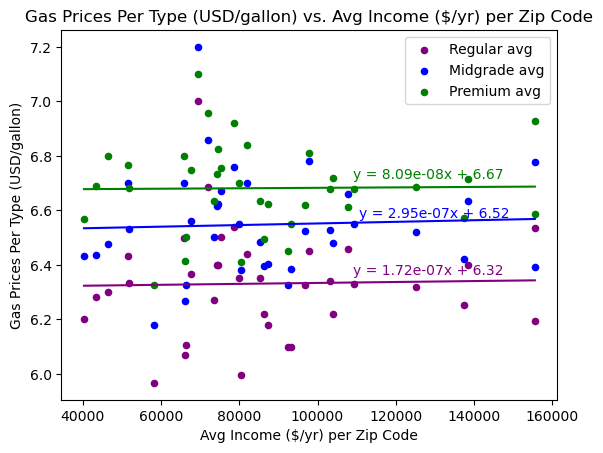

In [12]:
#plotting gas prices by income
ax = gas_sorted_by_income.plot(x = "Household Income Median", y = "Regular avg", kind= "scatter", label = "Regular avg", color = "purple")
gas_sorted_by_income.plot(x = "Household Income Median", y = "Midgrade avg", kind= "scatter", label = "Midgrade avg", color = "blue", ax = ax)
gas_sorted_by_income.plot(x = "Household Income Median", y = "Premium avg", kind= "scatter", label = "Premium avg", color = "green", ax = ax)

#plotting linear regression values and outputing rsqaured values
regular = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Regular avg"], "purple")
midgrade = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Midgrade avg"], "blue")
premium = linear_regression(gas_sorted_by_income["Household Income Median"],gas_sorted_by_income["Premium avg"], "green")

#labeling linear regression equations
plt.figtext(0.58,0.37, regular,fontsize=10,color="purple")
plt.figtext(0.59,0.49, midgrade,fontsize=10,color="blue")
plt.figtext(0.58,0.57, premium,fontsize=10,color="green")

#adding labels and titles to graph
plt.xlabel("Avg Income ($/yr) per Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Avg Income ($/yr) per Zip Code")

#Save the figure
plt.savefig("Fig_output/fig04_gastypevsincomezip.png")

plt.show()

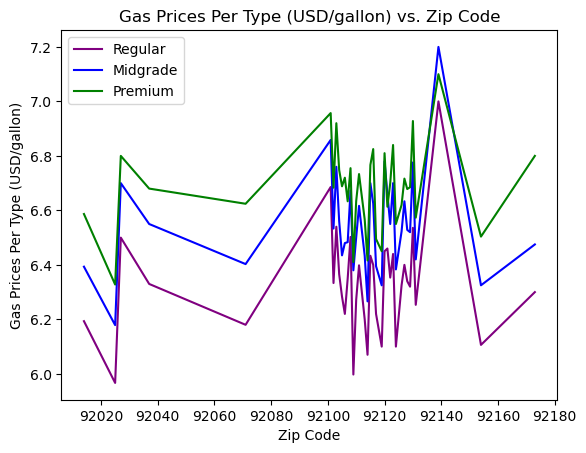

In [13]:
#plotting gas prices per zipcode as aline
gas_data_df.plot(x= "zip code", y= ["Regular avg", "Midgrade avg", "Premium avg"] , kind= "line", 
                 color= ["purple", "blue", "green"],label = ["Regular", "Midgrade", "Premium"])

#adding labels and titles to graph
plt.xlabel("Zip Code")
plt.ylabel("Gas Prices Per Type (USD/gallon)")
plt.title("Gas Prices Per Type (USD/gallon) vs. Zip Code")

#Save the figure
plt.savefig("Fig_output/fig05_gaspricevszip.png")

plt.show()

### 3. Density vs Regular Average Gas Price

In [14]:
#reading in data
gas_data_density_df = gas_data_df.sort_values('density')
gas_data_density_df.head()

,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
23,23,92121,32.89730,-117.20231,San Diego,4213.0,129.7,6.460000,6.660000,6.613333,107786
32,32,92131,32.89604,-117.05737,San Diego,36070.0,360.4,6.253333,6.420000,6.573333,137500
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
34,34,92154,32.57800,-116.96621,San Diego,85024.0,639.9,6.106250,6.325000,6.503750,66498
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531


The r-squared is : 0.22


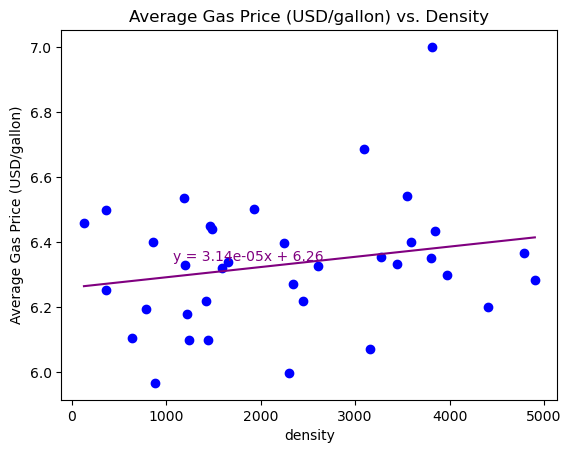

In [15]:
# Create scatter plot to show Gas Price vs. Density
plt.scatter(gas_data_density_df['density'], gas_data_density_df['Regular avg'], c='blue')

#adding labels and title to graph
plt.xlabel("density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")

#plotting linear regression line and outputing rsquared values
density = linear_regression(gas_data_density_df["density"],gas_data_density_df["Regular avg"], "purple")

#labeling linear regression line with equation
plt.figtext(0.3,0.4, density,fontsize=10,color="purple")

#Save the figure
plt.savefig("Fig_output/fig06_avggasvsdensity.png")

plt.show()

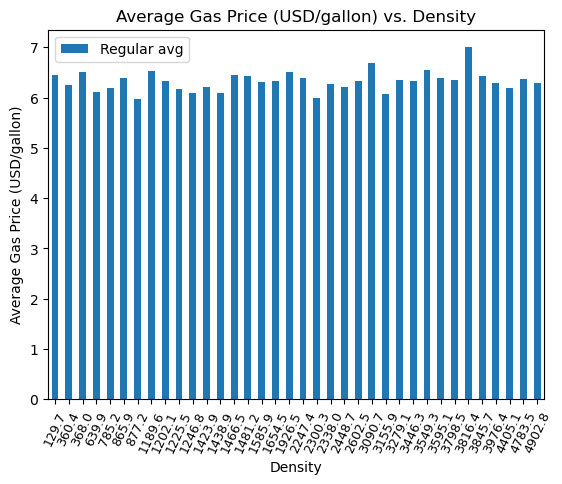

In [16]:
# Create bar graph to show Gas Price vs. Density
ax = gas_data_density_df.plot(x= "density", y= "Regular avg", rot=65, kind= "bar", width=.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9) 

#adding labels and titles to figure
plt.xlabel("Density")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Density")

#Save the figure
plt.savefig("Fig_output/fig07_avggasvsdensitybar.png")

plt.show()

### 4. Average Gas Price vs. Zip Code

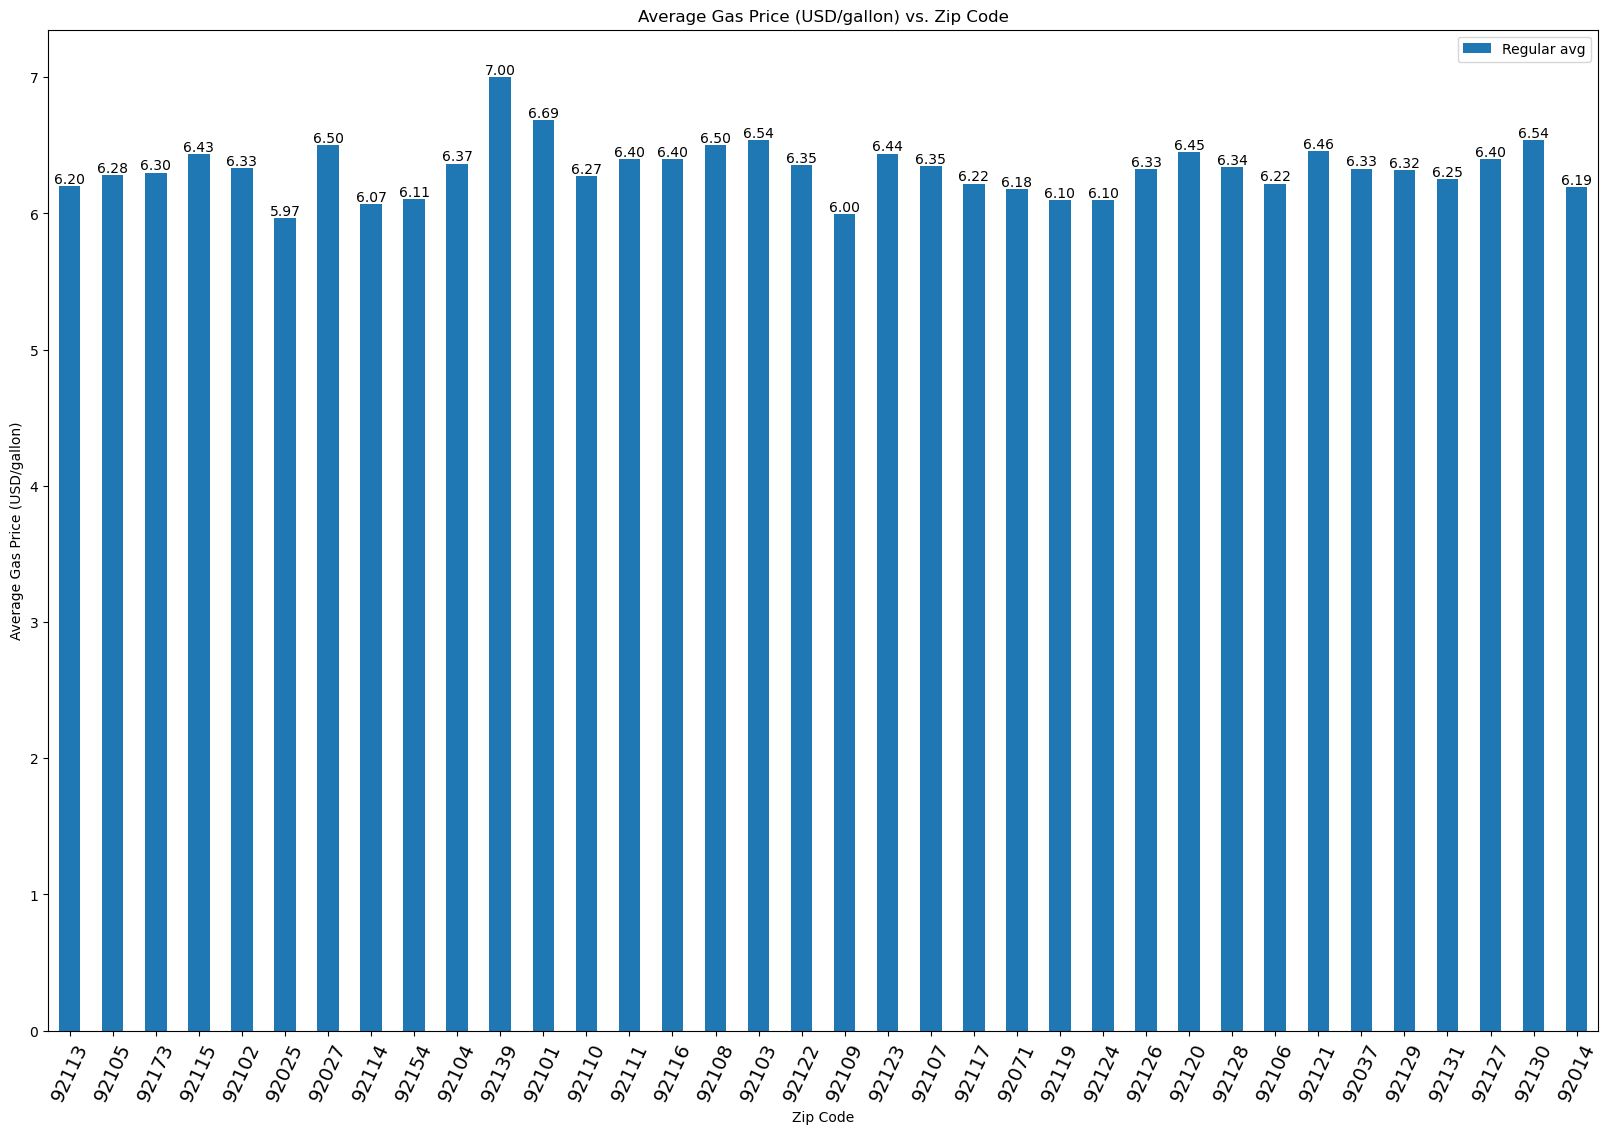

In [17]:
#plotting average regular gas prices per zipcode
ax = gas_sorted_by_income.plot(x= "zip code", y= "Regular avg", rot=65, kind= "bar", width=.5, figsize=(20,13))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14) 
#adding labels to each bar
#https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
ax.bar_label(ax.containers[0],fmt='%.2f')

#adding labels and titles to graph
plt.xlabel("Zip Code")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Zip Code")

#Save the figure
plt.savefig("Fig_output/fig08_avggasvszip.png")

plt.show()

### 5. Average Gas Price vs. Population

The r-squared is : -0.18


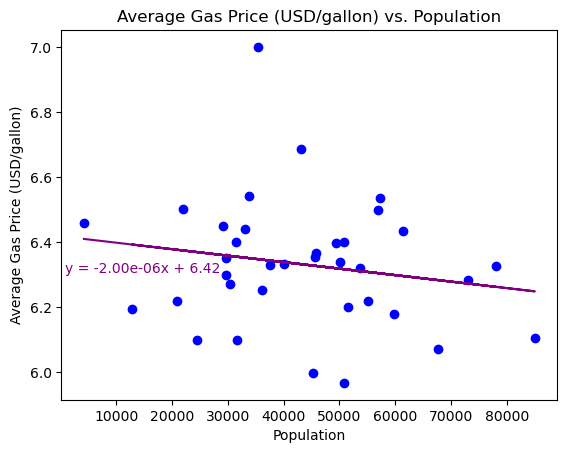

In [18]:
#plotting average regular gas price per population
plt.scatter(gas_data_density_df['population'], gas_data_density_df['Regular avg'], c='blue')

#adding labels and title to graph
plt.xlabel("Population")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Population")

#plotting linear regression line and outputing sqaured values
population = linear_regression(gas_data_density_df["population"],gas_data_density_df["Regular avg"], "purple")

#labeling linear regression line with equation
plt.figtext(.13,.375, population,fontsize=10,color="purple")

#Save the figure
plt.savefig("Fig_output/fig09_avggasypop.png")

plt.show()

### 6. Average Gas Price vs. Median Household Income 

The r-squared is : 0.03


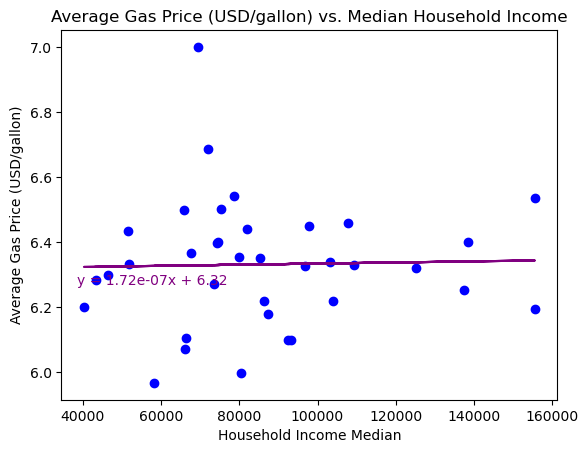

In [19]:
#plotting average regular gas price by income
plt.scatter(gas_data_density_df['Household Income Median'], gas_data_density_df['Regular avg'], c='blue')

#adding labels and titles to graph
plt.xlabel("Household Income Median")
plt.ylabel("Average Gas Price (USD/gallon)")
plt.title("Average Gas Price (USD/gallon) vs. Median Household Income")

#plotting linear regression line and outputing rsquared values
household_income = linear_regression(gas_data_density_df["Household Income Median"],gas_data_density_df["Regular avg"], "purple")

#labeling linear regression line with equation
plt.figtext(.15,.35, household_income,fontsize=10,color="purple")

#Save the figure
plt.savefig("Fig_output/fig10_avggasvsincome.png")

plt.show()

In [20]:
gas_data_df.head()

# formats = {'population': '{:.2f}', 'density': '{:.2f}','Regular avg': '${:.2f}','Midgrade avg': '${:.2f}','Premium avg': '${:.2f}','Household Income Median': '${:,}'}
# gas_data_format = gas_data_df.style.format(formats)
# gas_data_format



,Unnamed: 0,zip code,lat,lng,city,population,density,Regular avg,Midgrade avg,Premium avg,Household Income Median
0,0,92014,32.96797,-117.24879,Del Mar,12823.0,785.2,6.193333,6.393333,6.586667,155531
1,1,92025,33.08492,-117.02967,Escondido,50831.0,877.2,5.966667,6.178889,6.327778,58273
2,2,92027,33.13263,-116.98335,Escondido,56878.0,368.0,6.500000,6.700000,6.800000,65989
3,3,92037,32.85257,-117.25104,La Jolla,37505.0,1202.1,6.330000,6.550000,6.680000,109194
4,4,92071,32.85045,-116.99479,Santee,59826.0,1225.5,6.180000,6.402857,6.624286,87334


In [21]:
%%capture --no-display

#adding hover information
hover=HoverTool(tooltips=[('zip code', '@zip_code'), 
                            ('Household Income Median','$@Household_Income_Median{0,0}'),
                            ('Regular avg','$@Regular_avg'),
                            ('Midgrade avg','$@Midgrade_avg'),
                            ('Premium avg','$@Premium_avg') ])

# Configure the map plot
SD_gas_by_zip = gas_data_df.hvplot.points(
    x = "lng",
    y = "lat",
    xlabel = "Longitude",
    ylabel = "Latitude",
    geo = True,
    tiles = "OSM",
    width = 700,
    height = 500,
    size = 30,
    scale = 1,
    color = "b",
    alpha=0.65,
    hover_cols = ["zip code", 
                "Household Income Median", 
                "Regular avg", 
                "Midgrade avg", 
                "Premium avg"],
    tools=[hover])
    
#Save the figure
hvplot.save(SD_gas_by_zip, "Fig_output/fig11_sdgasmap.html")

# Display the map 
SD_gas_by_zip



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (zip code,Household Income Median,Regular avg,Midgrade avg,Premium avg)